### Install tensorflow & keras

In [2]:
!pip install --upgrade tensorflow
!pip install keras

import sys
from keras.layers import Dense
from keras.models import Sequential
print(sys.version)
print(sys.version_info)

  Using cached https://files.pythonhosted.org/packages/81/07/be624c7e0a63b080a76b7f6faf417eecdc5f6480f6a740a8bcf8991bce0b/tensorflow-1.12.0-cp36-cp36m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 3.1MB 3.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/fc/94/74e0fa783d3fc07e41715973435dd051ca89c550881b3454233c39c73e69/Keras_Preprocessing-1.0.5-py2.py3-none-any.whl
    100% |████████████████████████████████| 2.1MB 3.9MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/3f/c4/2ff40221029f7098d58f8d7fb99b97e8100f3293f9856f0fb5834bef100b/Keras_Applications-1.0.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c7/27/133f225035b9539f2dcfebcdf9a69ff0152f56e0120160ec5c972ea7deb9/protobuf-3.6.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_

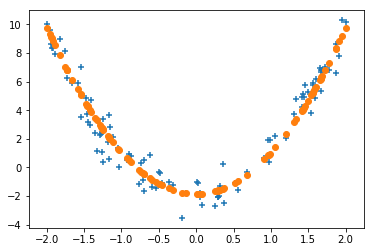

In [314]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100, 1) # 0 ~ 1 사이의 난수를 100개 생성
x = x * 4 - 2 # 값의 범위를 -2 ~ 2 사이로 변경
y = 3 * x**2 - 2 # y = a*x**2 + b*x+ c
y += np.random.randn(100, 1) # 평균이 0이고 표준편차가 1인 정규분포 

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x**2, y)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x**2), marker='o')
plt.show()

### Function approximation using keras
> 4원 4차 방정식을 DNN을 통해 근사하는 방법

(200, 1) (200, 1)


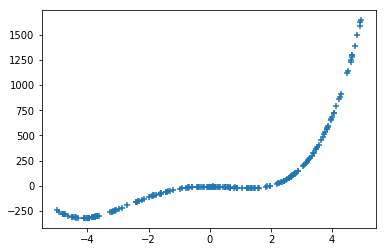

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_351 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_352 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_353 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_354 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_355 (Dense)            (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [315]:
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
dim = 200
feat = 1
x = np.random.rand(dim, feat)
x = x * 10 - 5 # -5 ~ 5
y = 2 * x**4 + 8 * x**3 - 20 * x**2 - 3 * x - 9
y += np.random.randn(dim, 1) * 2.0 # 평균이 0이고 표준편차가 1인 정규분포 200개
x_train = x
y_train = y
print(x.shape, y.shape)
plt.scatter(x_train, y_train, marker='+')
plt.show()

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, batch_size=1, epochs=2000, verbose=0)

dict_keys(['loss'])


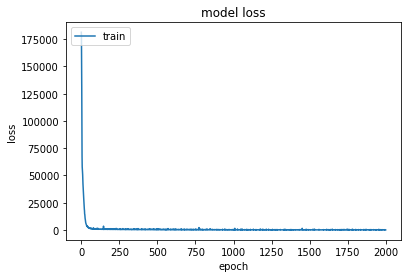

In [318]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

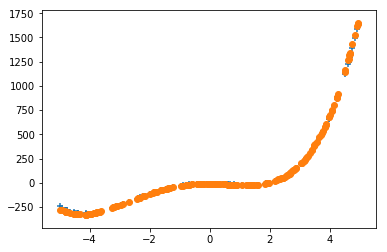

In [319]:
import matplotlib.pyplot as plt

x_dest = model.predict(x_train)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, x_dest, marker='o')
plt.show()

In [320]:
x_test = [5.0]
x_result = model.predict(x_test)
print(x_result)

[[1674.8434]]


In [263]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#Variables
dataset=np.loadtxt("cars.csv", delimiter=",")
x=dataset[:,0:5]
y=dataset[:,5]
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 12)                72        
_________________________________________________________________
dense_244 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
Train on 577 samples, validate on 145 samples
Epoch 1/150
577/577 [==============================] - 3s 6ms/step - loss: 0.2201 - mean_squared_error: 0.2201 - mean_absolute_error: 0.3578 - val_loss: 0.2123 - val_mean_squared_error: 0.2123 - val_mean_absolute_error: 0.3626
Epoch 2/150
577/577 [======================

577/577 [==============================] - 0s 72us/step - loss: 0.0187 - mean_squared_error: 0.0187 - mean_absolute_error: 0.1022 - val_loss: 0.0227 - val_mean_squared_error: 0.0227 - val_mean_absolute_error: 0.1170
Epoch 34/150
577/577 [==============================] - 0s 73us/step - loss: 0.0187 - mean_squared_error: 0.0187 - mean_absolute_error: 0.1018 - val_loss: 0.0228 - val_mean_squared_error: 0.0228 - val_mean_absolute_error: 0.1166
Epoch 35/150
577/577 [==============================] - 0s 71us/step - loss: 0.0187 - mean_squared_error: 0.0187 - mean_absolute_error: 0.1018 - val_loss: 0.0224 - val_mean_squared_error: 0.0224 - val_mean_absolute_error: 0.1161
Epoch 36/150
577/577 [==============================] - 0s 68us/step - loss: 0.0186 - mean_squared_error: 0.0186 - mean_absolute_error: 0.1011 - val_loss: 0.0226 - val_mean_squared_error: 0.0226 - val_mean_absolute_error: 0.1158
Epoch 37/150
577/577 [==============================] - 0s 79us/step - loss: 0.0186 - mean_square

Epoch 69/150
577/577 [==============================] - 0s 71us/step - loss: 0.0182 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0976 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_mean_absolute_error: 0.1120
Epoch 70/150
577/577 [==============================] - 0s 67us/step - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0974 - val_loss: 0.0212 - val_mean_squared_error: 0.0212 - val_mean_absolute_error: 0.1113
Epoch 71/150
577/577 [==============================] - 0s 74us/step - loss: 0.0182 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0982 - val_loss: 0.0214 - val_mean_squared_error: 0.0214 - val_mean_absolute_error: 0.1114
Epoch 72/150
577/577 [==============================] - 0s 73us/step - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0971 - val_loss: 0.0215 - val_mean_squared_error: 0.0215 - val_mean_absolute_error: 0.1116
Epoch 73/150
577/577 [==============================] - 0s 70us/step - loss: 0.0180 

Epoch 105/150
577/577 [==============================] - 0s 69us/step - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0968 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1110
Epoch 106/150
577/577 [==============================] - 0s 71us/step - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0980 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1099
Epoch 107/150
577/577 [==============================] - 0s 68us/step - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0969 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1112
Epoch 108/150
577/577 [==============================] - 0s 67us/step - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0968 - val_loss: 0.0209 - val_mean_squared_error: 0.0209 - val_mean_absolute_error: 0.1101
Epoch 109/150
577/577 [==============================] - 0s 83us/step - loss: 0.

Epoch 141/150
577/577 [==============================] - 0s 69us/step - loss: 0.0179 - mean_squared_error: 0.0179 - mean_absolute_error: 0.0973 - val_loss: 0.0208 - val_mean_squared_error: 0.0208 - val_mean_absolute_error: 0.1097
Epoch 142/150
577/577 [==============================] - 0s 72us/step - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0962 - val_loss: 0.0215 - val_mean_squared_error: 0.0215 - val_mean_absolute_error: 0.1108
Epoch 143/150
577/577 [==============================] - 0s 73us/step - loss: 0.0178 - mean_squared_error: 0.0178 - mean_absolute_error: 0.0963 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1096
Epoch 144/150
577/577 [==============================] - 0s 74us/step - loss: 0.0179 - mean_squared_error: 0.0179 - mean_absolute_error: 0.0971 - val_loss: 0.0209 - val_mean_squared_error: 0.0209 - val_mean_absolute_error: 0.1095
Epoch 145/150
577/577 [==============================] - 0s 76us/step - loss: 0.

In [1]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined